In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Knicks_All_Seasons_data = pd.read_csv('Knicks_Per_Game_data.txt')
Knicks_All_Seasons_data

,Season,Lg,Tm,W,L,Finish,Unnamed: 6,Age,Ht.,Wt.,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2023-24,NBA,NYK,41,27,2,NaN,26.4,6-5,218.0,...,0.785,12.9,33.0,45.9,23.8,7.3,4.1,13.4,17.7,112.0
1,2022-23,NBA,NYK,47,35,3,NaN,24.5,6-6,218.0,...,0.761,12.6,34.0,46.6,22.9,6.4,4.1,13.0,20.3,116.0
2,2021-22,NBA,NYK,37,45,5,NaN,26.0,6-6,218.0,...,0.744,11.5,34.6,46.1,21.9,7.0,4.9,13.3,20.4,106.5
3,2020-21,NBA,NYK,41,31,3,NaN,25.6,6-6,217.0,...,0.784,9.7,35.5,45.1,21.4,7.0,5.1,12.9,20.5,107.0
4,2019-20,NBA,NYK,21,45,5,NaN,24.5,6-6,222.0,...,0.694,12.0,34.5,46.5,22.1,7.6,4.7,14.3,22.2,105.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1950-51,NBA,NYK,36,30,3,NaN,NaN,NaN,NaN,...,0.714,NaN,NaN,51.8,23.5,NaN,NaN,NaN,27.4,85.8
74,1949-50,NBA,NYK,40,28,2,NaN,NaN,NaN,NaN,...,0.711,NaN,NaN,NaN,19.2,NaN,NaN,NaN,25.3,80.7
75,1948-49,BAA,NYK,32,28,2,NaN,NaN,NaN,NaN,...,0.702,NaN,NaN,NaN,17.0,NaN,NaN,NaN,26.0,79.2
76,1947-48,BAA,NYK,26,22,2,NaN,NaN,NaN,NaN,...,0.672,NaN,NaN,NaN,7.8,NaN,NaN,NaN,22.4,74.5


In [3]:
Knicks_ASD_df = pd.DataFrame(Knicks_All_Seasons_data)

print("Column headers:")
print(Knicks_ASD_df.columns)

Column headers:
Index(['Season', 'Lg', 'Tm', 'W', 'L', 'Finish', 'Unnamed: 6', 'Age', 'Ht.',
       'Wt.', 'Unnamed: 10', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [4]:
# columns_to_use = ['Season', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
# dtype_dict = {'Season': str}
# 
# # Load the CSV file with only the selected columns
# All_Seasons_df = pd.read_csv('Knicks_Per_Game_data.txt', usecols=columns_to_use, dtype=dtype_dict)
# 
# # Filter the DataFrame to exclude rows before the 1979 season
# All_Seasons_df = All_Seasons_df[All_Seasons_df['Season'].astype(int) >= 1979]
# 
# # Change data type for non-'Season' columns to float
# for col in columns_to_use[1:]:
#     dtype_dict[col] = float
# 
# # Apply the data type conversion to the DataFrame
# All_Seasons_df = All_Seasons_df.astype(dtype_dict)
# 
# # Display the first few rows of the DataFrame to verify
# print(All_Seasons_df.head())

# SHOWED - ValueError: invalid literal for int() with base 10: '2023-24'

In [5]:
# Define the columns you want to use
columns_to_use = ['Season', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Load the CSV file with only the selected columns
All_Seasons_df = pd.read_csv('Knicks_Per_Game_data.txt', usecols=columns_to_use)

# Extract the starting year of each season
All_Seasons_df['Starting_Year'] = All_Seasons_df['Season'].str.split('-').str[0]

for col in columns_to_use[1:]:
    All_Seasons_df[col] = All_Seasons_df[col].astype(float)

# Filter the DataFrame to exclude rows before the 1979 season
All_Seasons_df = All_Seasons_df[All_Seasons_df['Starting_Year'].astype(int) >= 1979]

# Drop the 'Starting_Year' column
All_Seasons_df.drop(columns=['Starting_Year'], inplace=True)

# Display the first few rows of the DataFrame to verify
print(All_Seasons_df.head())


    Season    FG   FGA    FG%    3P   3PA    3P%    2P   2PA    2P%  ...  \
0  2023-24  40.8  88.6  0.461  13.0  35.9  0.362  27.8  52.7  0.528  ...   
1  2022-23  42.0  89.4  0.470  12.6  35.7  0.354  29.4  53.6  0.547  ...   
2  2021-22  37.7  86.2  0.437  13.2  36.9  0.357  24.5  49.3  0.497  ...   
3  2020-21  39.4  86.5  0.456  11.8  30.0  0.392  27.7  56.4  0.490  ...   
4  2019-20  40.0  89.3  0.447   9.6  28.4  0.337  30.4  61.0  0.499  ...   

     FT%   ORB   DRB   TRB   AST  STL  BLK   TOV    PF    PTS  
0  0.785  12.9  33.0  45.9  23.8  7.3  4.1  13.4  17.7  112.0  
1  0.761  12.6  34.0  46.6  22.9  6.4  4.1  13.0  20.3  116.0  
2  0.744  11.5  34.6  46.1  21.9  7.0  4.9  13.3  20.4  106.5  
3  0.784   9.7  35.5  45.1  21.4  7.0  5.1  12.9  20.5  107.0  
4  0.694  12.0  34.5  46.5  22.1  7.6  4.7  14.3  22.2  105.8  

[5 rows x 22 columns]


In [6]:
# plt.figure(figsize=(20, 16))
# plt.subplot(2, 1, 1)
# sns.barplot(All_Seasons_df, x='Season', y='PTS')
# plt.title('Knicks Points Per Game')
# plt.xlabel('Season')
# plt.ylabel('Points')
# plt.xticks(rotation=45)
# plt.legend(title='3P')
# plt.subplot(2, 1, 2)
# sns.barplot(All_Seasons_df, x='Season', y='3P')
# plt.title('Knicks Season 3P')
# plt.xlabel('Season')
# plt.ylabel('3P')
# plt.xticks(rotation=45)
# plt.legend(title='3P')

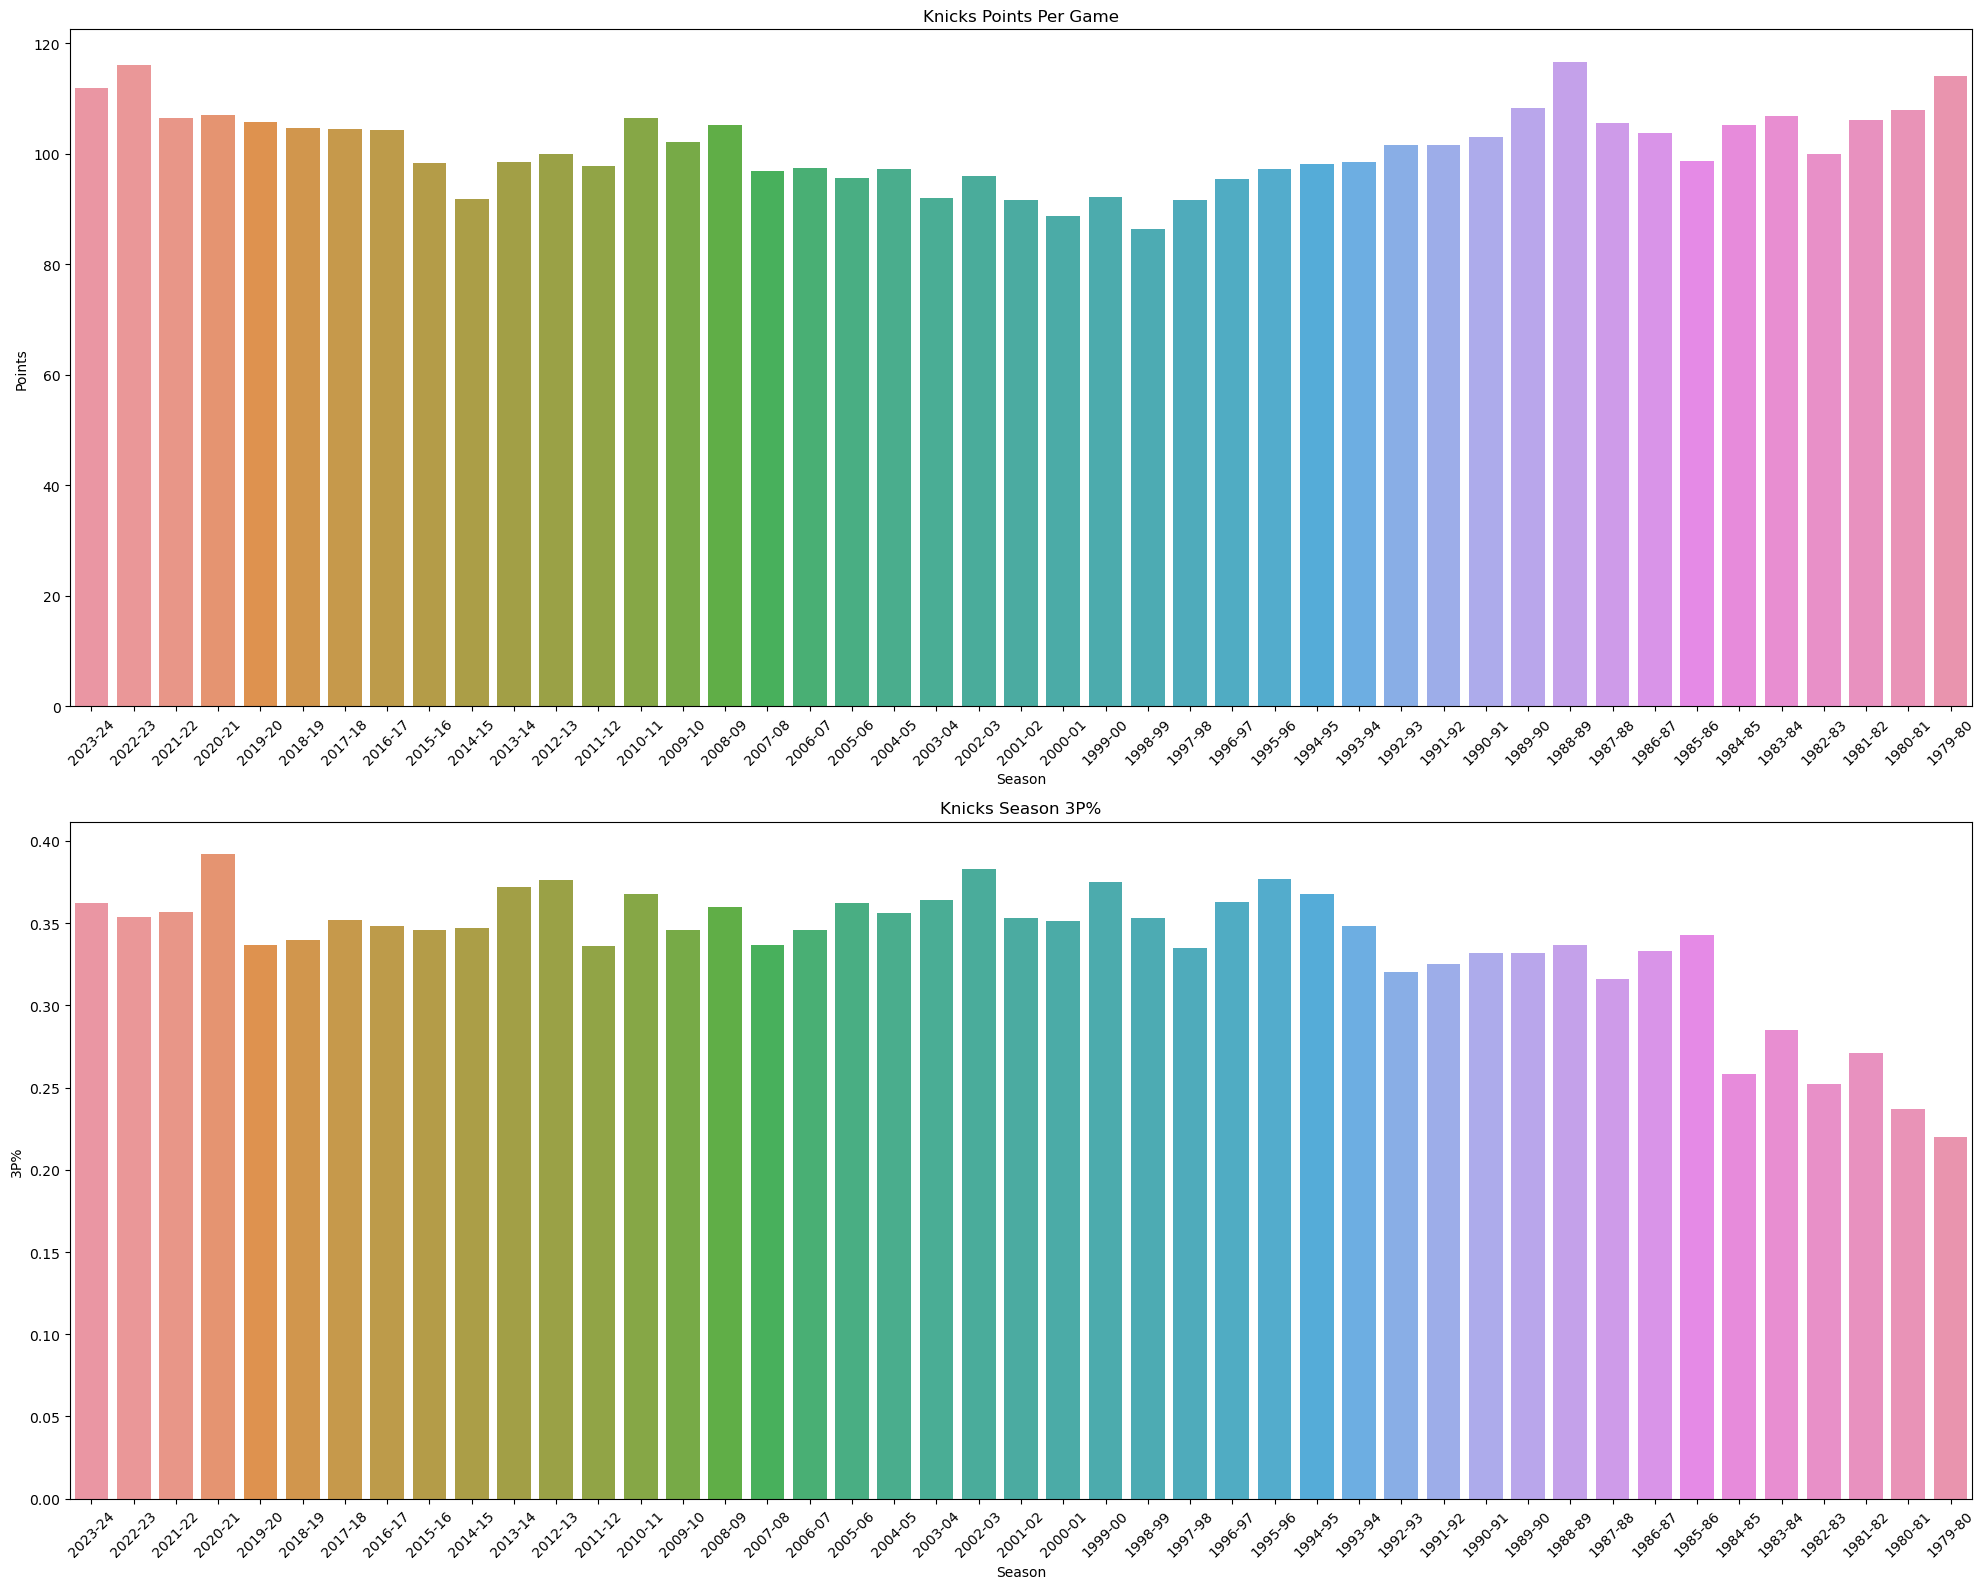

In [7]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 1, 1)
sns.barplot(All_Seasons_df, x='Season', y='PTS')
plt.title('Knicks Points Per Game')
plt.xlabel('Season')
plt.ylabel('Points')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(All_Seasons_df, x='Season', y='3P%')
plt.title('Knicks Season 3P%')
plt.xlabel('Season')
plt.ylabel('3P%')
plt.xticks(rotation=45)
# plt.legend(title='3P')

plt.tight_layout()
plt.show()

In [8]:
# with pd.option_context('mode.use_inf_as_na', True):
#    # Assuming All_Seasons_df is your DataFrame containing the data
#    # For example:
#    # All_Seasons_df = pd.read_csv('Knicks_Per_Game_data.txt')

#    # Assuming you want to plot 'FG' and 'FGA' columns
#    # Adjust x and y accordingly based on your DataFrame
#    x = All_Seasons_df['Season']
#    y1 = All_Seasons_df['3P']
#    y2 = All_Seasons_df['PTS']

#    # Plotting
#    sns.lineplot(x=x, y=y1, label='3P')
#    sns.lineplot(x=x, y=y2, label='PTS')

#    # Customize plot
#    plt.xlabel('Season')
#    plt.ylabel('Count')
#    plt.title('Field Goals and Field Goal Attempts over Seasons')
#    plt.legend()

#    # Show plot
#    plt.show()

In [9]:
# 
# # Convert infinite values to NaN
# All_Seasons_df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)
# 
# # Assuming All_Seasons_df is your DataFrame containing the data
# # For example:
# # All_Seasons_df = pd.read_csv('Knicks_Per_Game_data.txt')
# 
# # Assuming you want to plot 'FG' and 'FGA' columns
# # Adjust x and y accordingly based on your DataFrame
# x = All_Seasons_df['Season']
# y1 = All_Seasons_df['3P%']
# y2 = All_Seasons_df['PTS']
# 
# # Plotting
# sns.lineplot(x=x, y=y1, label='3P%')
# sns.lineplot(x=x, y=y2, label='PTS')
# 
# # Customize plot
# plt.xlabel('Season')
# plt.ylabel('Count')
# plt.title('Field Goals and Field Goal Attempts over Seasons')
# plt.legend()
# 
# # Show plot
# plt.show()
